In [407]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.tree import  DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [408]:
# Loading dataset

In [409]:
data=pd.read_csv('Company_Data.csv')
data.head(20)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [410]:
data['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

**Categorizing sales column with 0=low sales; 1=moderate sales; 2=high sales**

In [411]:
def f(sales):
    if sales < 6:
        return '0'
    elif sales >= 6 and sales<=11:
        return '1'
    elif sales > 11:
        return '2'
    else:
        pass

In [412]:
d=data['Sales'].apply(f)

In [413]:
data['Sales']=d

In [414]:
sales_df=data
sales_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,111,48,16,260,83,Good,65,10,Yes,Yes
2,1,113,35,10,269,80,Medium,59,12,Yes,Yes
3,1,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0,141,64,3,340,128,Bad,38,13,Yes,No


**Here we are taking sales as dependent variable as we have to build the model to know which segments are effecting the sales**

In [415]:
x=sales_df.iloc[:,1:]
y=sales_df['Sales']

In [416]:
x=pd.get_dummies(x,columns=['Urban','US'], drop_first=True)
x['ShelveLoc']=x['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,138,73,11,276,120,3,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,3,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,3,50,12,1,1


In [417]:
y

0      1
1      2
2      1
3      1
4      0
      ..
395    2
396    1
397    1
398    0
399    1
Name: Sales, Length: 400, dtype: object

In [418]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=42)

In [419]:
print(x_train.shape, x_test.shape,y_train.shape,y_test.shape)

(280, 10) (120, 10) (280,) (120,)


**Decision Tree Classifier using Entropy Criteria**

In [420]:
model1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

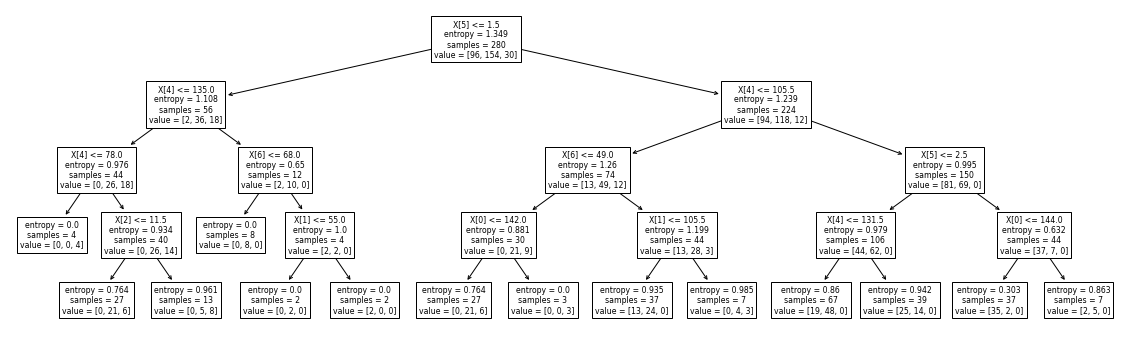

In [421]:
#PLot the decision tree
plt.figure(figsize =(20, 6)) 
tree.plot_tree(model1);

In [422]:
x.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban_Yes', 'US_Yes'],
      dtype='object')

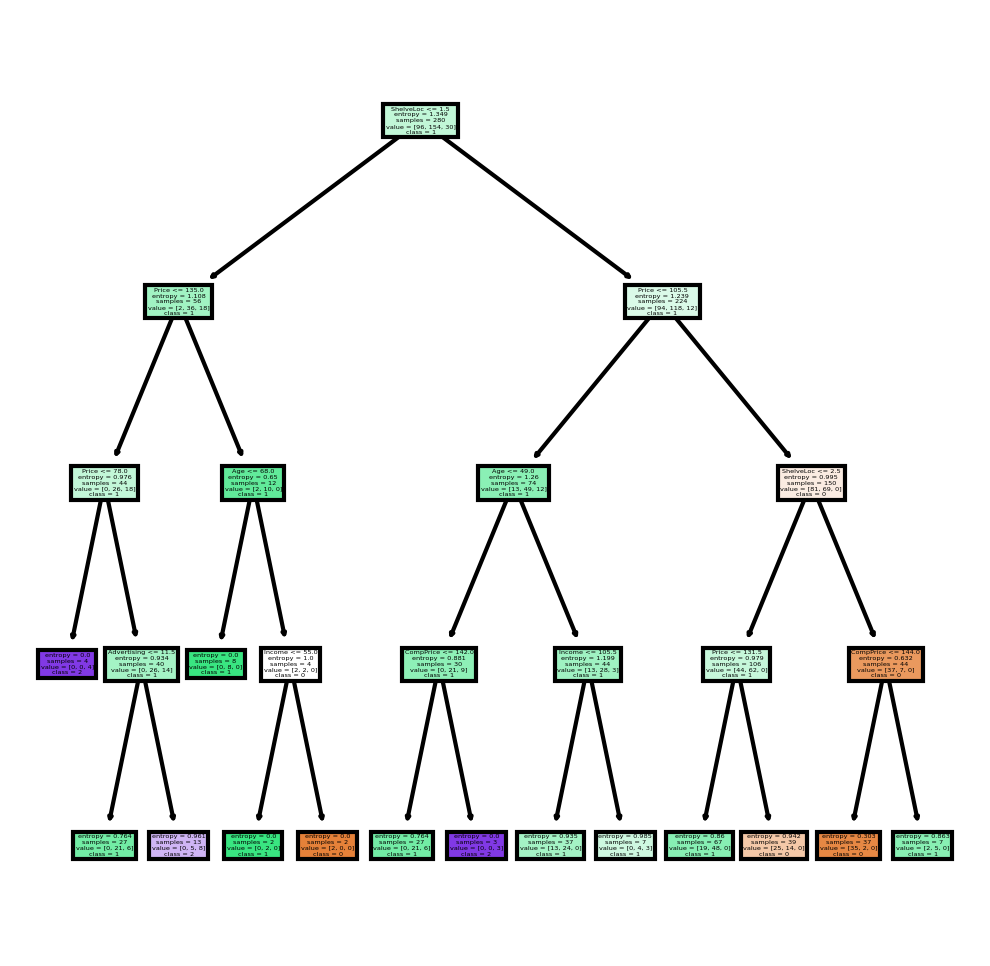

In [423]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban_Yes', 'US_Yes']
cn=['0', '1', '2']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model1,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [424]:
preds = model1.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    79
0    31
2    10
dtype: int64

In [425]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
Sales,,,
0,20,14,0
1,11,52,4
2,0,13,6


In [426]:
# The accuracy of model using entropy is 65%

In [427]:
np.mean(preds==y_test)

0.65

In [428]:
important_features = model1.feature_importances_
important_features

array([0.09571148, 0.08924185, 0.02477697, 0.        , 0.35862824,
       0.3270662 , 0.10457525, 0.        , 0.        , 0.        ])

In [429]:
# Important segments that effect the sales of the company

In [430]:
important_features_df=pd.DataFrame(important_features,columns=['importance'])
important_features_df['features']=pd.DataFrame(x.columns)
important_features_df

,importance,features
0,0.095711,CompPrice
1,0.089242,Income
2,0.024777,Advertising
3,0.000000,Population
4,0.358628,Price
5,0.327066,ShelveLoc
6,0.104575,Age
7,0.000000,Education
8,0.000000,Urban_Yes
9,0.000000,US_Yes


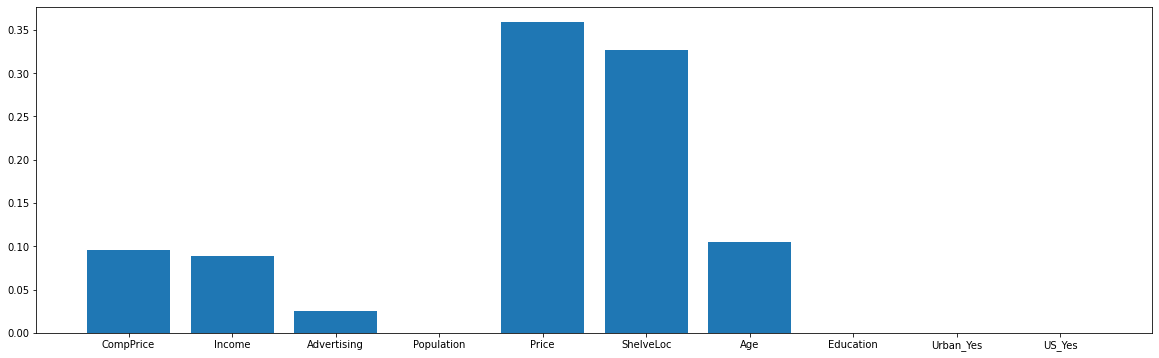

In [431]:
plt.figure(figsize =(20, 6))

plt.bar(important_features_df['features'], important_features_df['importance'], orientation = 'vertical');

**From above table and bar graph we can see Price and shelveloc are the segments which effect sales of the company**




**Decision Tree Classifier (CART) using Gini Criteria**

In [432]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=4)

In [433]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

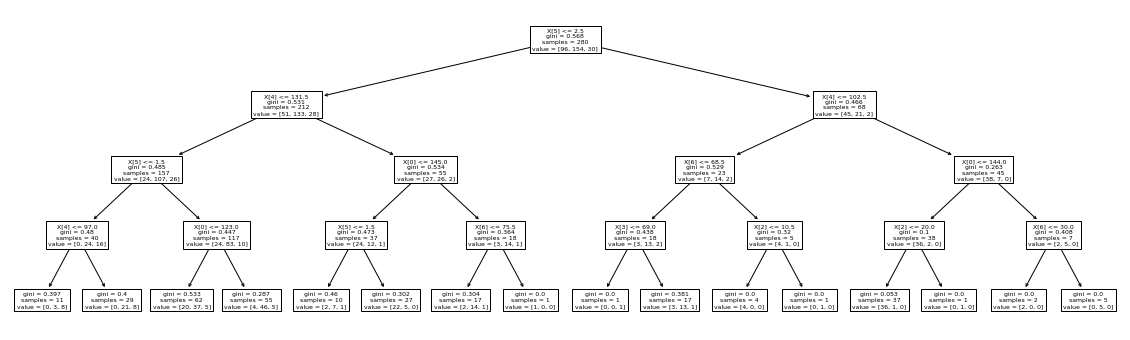

In [434]:
#PLot the decision tree
plt.figure(figsize =(20, 6)) 
tree.plot_tree(model_gini);

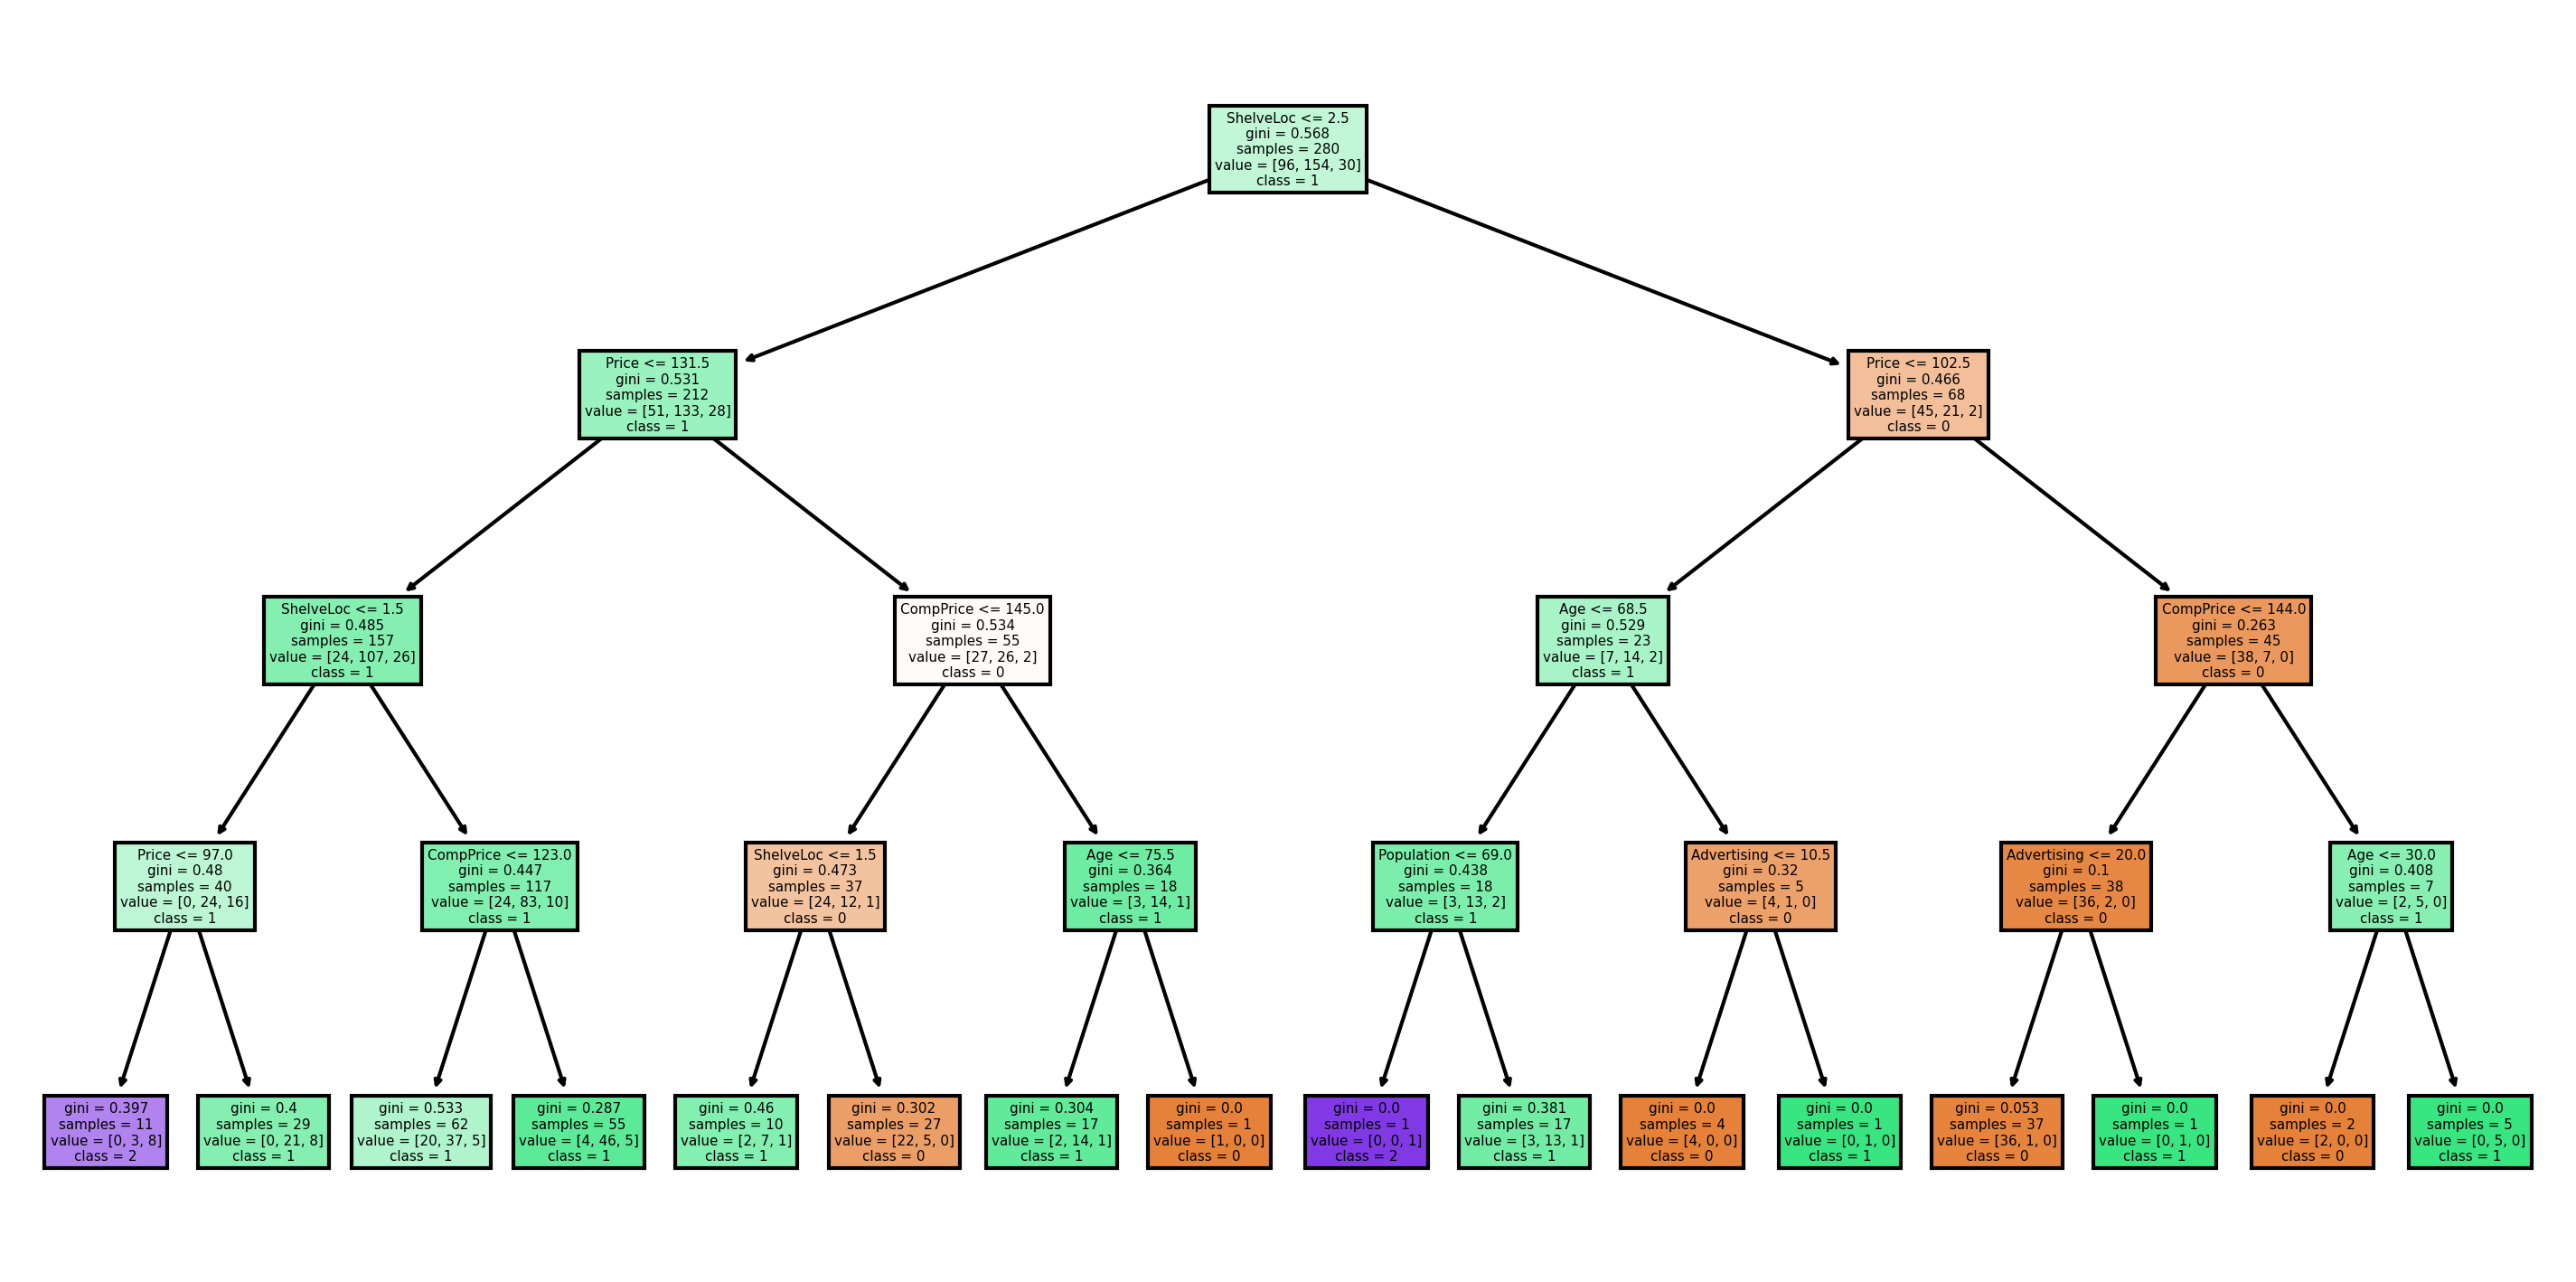

In [435]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban_Yes', 'US_Yes']
cn=['0', '1', '2']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,6), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [436]:
# The accuracy of model using gini is 67.5%

**Model Validation and Testing**

In [437]:
#Predicting on test data
preds = model_gini.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    84
0    29
2     7
dtype: int64

In [438]:
preds

array(['1', '0', '1', '0', '1', '0', '2', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '2', '1', '0', '1', '0', '1', '1', '0', '1',
       '1', '1', '0', '0', '1', '2', '1', '0', '1', '1', '0', '1', '1',
       '0', '1', '0', '1', '2', '1', '1', '1', '1', '0', '1', '1', '1',
       '1', '1', '1', '0', '1', '1', '2', '1', '1', '1', '0', '0', '1',
       '1', '1', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1', '1',
       '0', '0', '1', '2', '0', '1', '1', '1', '1', '1', '0', '1', '1',
       '1', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '0', '0', '1',
       '1', '0', '1'], dtype=object)

In [439]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
Sales,,,
0,19,15,0
1,10,57,0
2,0,12,7


In [440]:
# Accuracy 
np.mean(preds==y_test)

0.6916666666666667

**Building Decision Tree Classifier (CART) using Gini Criteria**

In [441]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [442]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [443]:
#Prediction and computing the accuracy
pred=model_gini.predict(x_test)
np.mean(preds==y_test)

0.6916666666666667

**Bagging**

In [444]:
# Bagged Decision Trees for Classification

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [445]:
seed = 7

kfold = KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100

In [446]:
Bagging_model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
Bagging_model.fit(x_train,y_train)
results = cross_val_score(Bagging_model, x_train, y_train, cv=kfold)

In [447]:
print(results.mean())

0.6321428571428571


In [448]:
Bagging_preds = Bagging_model.predict(x_test)

In [449]:
pd.crosstab(y_test,Bagging_preds)

col_0,0,1,2
Sales,,,
0,23,11,0
1,11,56,0
2,0,12,7


In [450]:
# Accuracy 
np.mean(Bagging_preds==y_test)

0.7166666666666667

**Random Forest**

In [451]:
from sklearn.ensemble import RandomForestClassifier

In [452]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)
Random_forest_model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
Random_forest_model.fit(x_train,y_train)

RandomForestClassifier(max_features=3)

In [453]:
Random_forest_results = cross_val_score(Random_forest_model, x_train, y_train, cv=kfold)
print(Random_forest_results.mean())

0.6785714285714286


In [454]:
Random_forest_preds = Random_forest_model.predict(x_test)
pd.crosstab(y_test,Random_forest_preds)

col_0,0,1,2
Sales,,,
0,22,12,0
1,9,58,0
2,0,14,5


In [455]:
# Accuracy 
np.mean(Random_forest_preds==y_test)

0.7083333333333334

**ADAPTIVE BOOSTING (ADABOOST)**

In [456]:
from sklearn.ensemble import AdaBoostClassifier

In [457]:
num_trees = 10
seed=7
kfold = KFold(n_splits=10)
AdaBoost_model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
AdaBoost_model.fit(x_train,y_train)


AdaBoostClassifier(n_estimators=10, random_state=7)

In [458]:
AdaBoost_results = cross_val_score(AdaBoost_model, x_train, y_train, cv=kfold)
print(AdaBoost_results.mean())

0.7071428571428571


In [459]:
AdaBoost_preds = AdaBoost_model.predict(x_test)
pd.crosstab(y_test,AdaBoost_preds)

col_0,0,1,2
Sales,,,
0,18,16,0
1,6,60,1
2,0,10,9


In [460]:
# Accuracy 
np.mean(Random_forest_preds==y_test)


0.7083333333333334